## Impor packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Myskill/dataset/TelcoCustomerChurn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data preprocessing & Data cleansing

In [ ]:
# General information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**observation:**

        *   This data include 7043 rows
        *   TotalCharges must be float64



In [ ]:
# Exclude rows with white space in 'TotalCharges' column
df = df[~df['TotalCharges'].isnull()]

# Convert or Transform 'TotalCharges' column to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [ ]:
# Missing value check
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# Check observation of missing values
features_na = [feature for feature in df.columns if df[feature].isnull().sum() > 1]
df[df[features_na[0]].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
# Treshold check
df.isna().sum() * 100 / len(df)

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

In [ ]:
df_clean = df.copy()

In [ ]:
#  missing value handling
df_clean = df.dropna()
print(df_clean['TotalCharges'].isnull().sum())

0


**observation:**

        *   Missing Value in TotalCharges is 11 items
        *   The TotalCharges treshold is below a certain significance threshold (in this case, 5% of the column's values), then drop

## Statisctical Summary

In [ ]:
# Statistical Summary
# group column names based on type

categoricals = ['gender','Partner','MultipleLines',
                'InternetService','OnlineSecurity', 'OnlineBackup',
                'DeviceProtection', 'TechSupport', 'StreamingTV',
                'StreamingMovies', 'Contract', 'PaperlessBilling',
                'PaymentMethod', 'Churn']
numericals = ['tenure', 'MonthlyCharges', 'TotalCharges','SeniorCitizen']



In [ ]:
# Numerical statistic summary (categorical)
df_clean[categoricals].describe()

,gender,Partner,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,3639,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


**observation:**

        *   Gender : Mostly costumers are male
        *   Partner : Majority are single
        *   InternetService : Majority using Fiber optic
        *   Contract : Month-to-month
        *   PaperlessBilling : Costumers use paperless billing
        *   PaymentMethod : Majority using Electronic check payment
        *   Churn : The majority of customers don't churn

        Majority costumer don't have these features
        *   MultipleLines, OnlineSecurity, OnlineBackup,  
            DeviceProtection, TechSupport, StreamingTV,StreamingMovie

In [ ]:
# Numerical statistic summary (numerical)
df_clean[numericals].describe()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,0.162400
std,24.545260,30.085974,2266.771362,0.368844
min,1.000000,18.250000,18.800000,0.000000
25%,9.000000,35.587500,401.450000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.862500,3794.737500,0.000000
max,72.000000,118.750000,8684.800000,1.000000


**observation:**

        *   Tenure : average subscription duration is around 32 months,
            ranging from 1 month to 72 month
        *   MonthlyCharges : average monthly is $64.80,
            75% of customers pay less than 89.86 per month
        *   TotalCharges :  average is abour $2283.30,
            Highest TotalCharges is about $8684.80
        *   SeniorCitizen : 16.24% of customers are senior citizen
            then, 83.76% are not senior citizen

## EDA Analyst

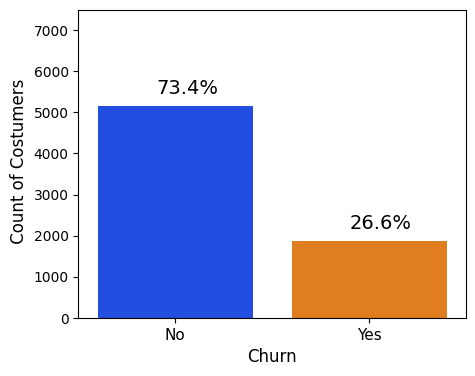

In [ ]:
# Distribution of the target variabel 'Churn'
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))

ax = sns.countplot(x="Churn", data=df_clean, hue="Churn", palette="bright", legend=False)

plt.xlabel("Churn", fontsize= 12)
plt.ylabel(" Count of Costumers", fontsize= 12)
plt.ylim(0,7500)
plt.xticks([0,1], ['No', 'Yes'], fontsize = 11)

total_count = len(df_clean)
for p in ax.patches:
    # Percentage of churn
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
    ax.annotate(percentage, (p.get_x()+0.30, p.get_height()+300), fontsize = 14)

plt.show()

**observation:**

        *   This plot show significant imbalance (may not be good for features performance)
        *   26.6% rate of customer churn and 73,4% don't churn

### Univariat Analysis

In [ ]:
demo_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
add_features = ['PhoneService', 'PaperlessBilling', 'MultipleLines','OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','InternetService', 'Contract', 'PaymentMethod']
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges','SeniorCitizen']

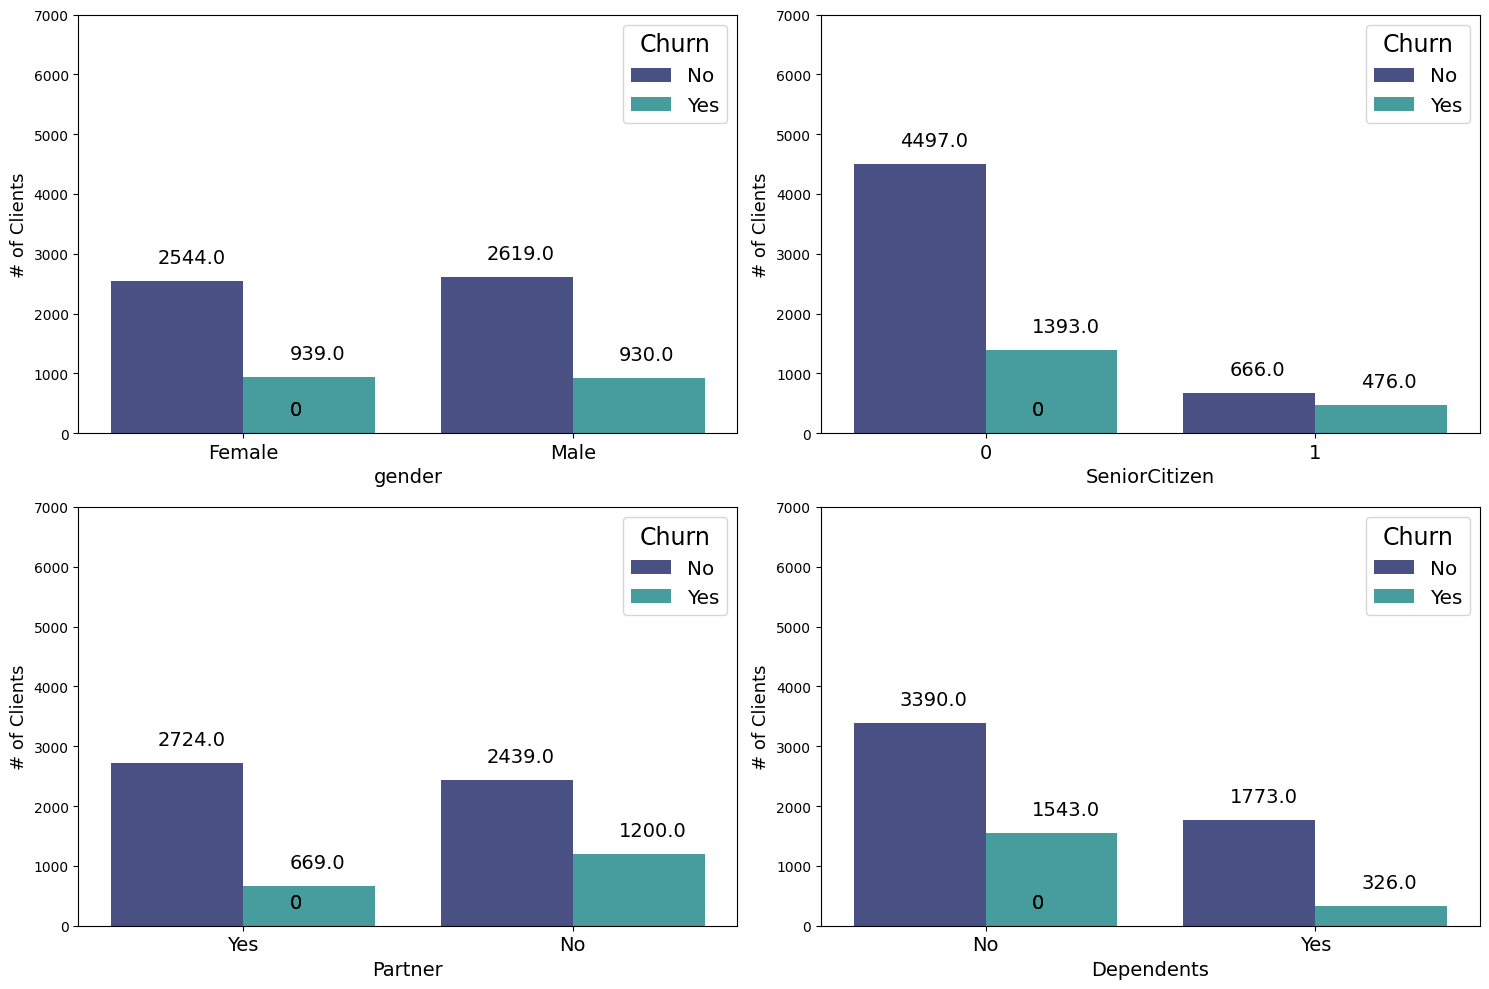

In [ ]:
# Demographic Features

plt.figure(figsize=(15,10))

for i,col in enumerate(demo_features):
    plt.subplot(2,2,i + 1)

    ax = sns.countplot(data = df_clean, x = col, hue="Churn", palette = 'mako')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# of Clients", fontsize= 13)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 14)

    plt.legend(title = 'Churn', fontsize='x-large', title_fontsize='17')

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.14, p.get_height()+300), fontsize= 14)

plt.tight_layout()

plt.show()

In [ ]:
for feature in demo_features:
    if feature in df_clean.columns:
        # Group by feature and churn, and calculate the count
        churn_counts = df_clean.groupby([feature, 'Churn']).size().unstack(fill_value=0)

        # Calculate the total count for each category
        churn_counts['Total'] = churn_counts.sum(axis=1)

        # Calculate churn percentage
        churn_counts['Churn_Percentage'] = (churn_counts['Yes'] / churn_counts['Total']) * 100
        churn_counts['No_Churn_Percentage'] = (churn_counts['No'] / churn_counts['Total']) * 100

        print(f"Feature: {feature}")
        print(churn_counts[['Churn_Percentage', 'No_Churn_Percentage']])
        print("\n")
    else:
        print(f"Feature {feature} not found in the dataframe")

Feature: gender
Churn   Churn_Percentage  No_Churn_Percentage
gender                                       
Female         26.959518            73.040482
Male           26.204565            73.795435


Feature: SeniorCitizen
Churn          Churn_Percentage  No_Churn_Percentage
SeniorCitizen                                       
0                     23.650255            76.349745
1                     41.681261            58.318739


Feature: Partner
Churn    Churn_Percentage  No_Churn_Percentage
Partner                                       
No              32.976092            67.023908
Yes             19.717065            80.282935


Feature: Dependents
Churn       Churn_Percentage  No_Churn_Percentage
Dependents                                       
No                 31.279140            68.720860
Yes                15.531205            84.468795




**observation:**

        *   Gender        : There is a slight difference between males and females.
        *   SeniorCitizen : 41% senior citizens are churn
        *   Partner       : Single customers are more likely to churn are around 32%
        *   Dependents    : Customers without dependents likely churn are around 31%


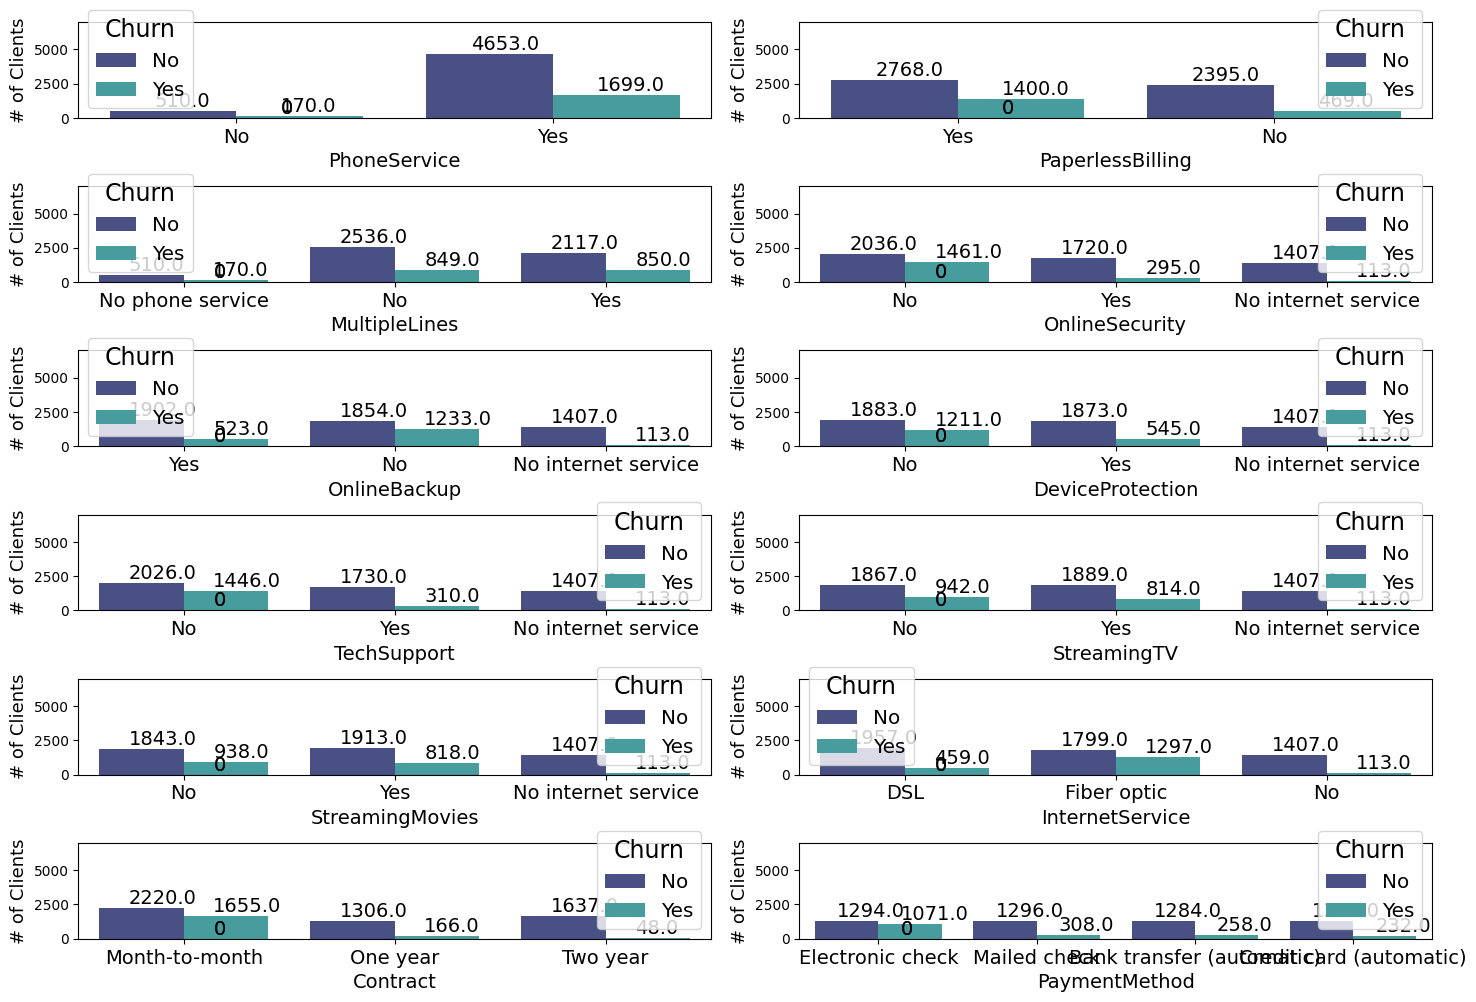

In [ ]:
# Additional Service Features

plt.figure(figsize=(15,10))

# Count the required columns
num_plots = len(add_features)
num_rows = num_plots // 2 + num_plots % 2
num_cols = 2

for i, col in enumerate(add_features):
    plt.subplot(num_rows, num_cols, i + 1)

    ax = sns.countplot(data = df_clean, x = col, hue="Churn", palette = 'mako')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# of Clients", fontsize= 13)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 14)

    plt.legend(title = 'Churn', fontsize='x-large', title_fontsize='17')

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.14, p.get_height()+300), fontsize= 14)

plt.tight_layout()

plt.show()

In [ ]:
for feature in add_features:
    if feature in df_clean.columns:
        # Group by feature and churn, and calculate the count
        churn_counts = df_clean.groupby([feature, 'Churn']).size().unstack(fill_value=0)

        # Calculate the total count for each category
        churn_counts['Total'] = churn_counts.sum(axis=1)

        # Calculate churn percentage
        churn_counts['Churn_Percentage'] = (churn_counts['Yes'] / churn_counts['Total']) * 100
        churn_counts['No_Churn_Percentage'] = (churn_counts['No'] / churn_counts['Total']) * 100

        print(f"Feature: {feature}")
        print(churn_counts[['Churn_Percentage', 'No_Churn_Percentage']])
        print("\n")
    else:
        print(f"Feature {feature} not found in the dataframe")

Feature: PhoneService
Churn         Churn_Percentage  No_Churn_Percentage
PhoneService                                       
No                   25.000000            75.000000
Yes                  26.747481            73.252519


Feature: PaperlessBilling
Churn             Churn_Percentage  No_Churn_Percentage
PaperlessBilling                                       
No                       16.375698            83.624302
Yes                      33.589251            66.410749


Feature: MultipleLines
Churn             Churn_Percentage  No_Churn_Percentage
MultipleLines                                          
No                       25.081241            74.918759
No phone service         25.000000            75.000000
Yes                      28.648466            71.351534


Feature: OnlineSecurity
Churn                Churn_Percentage  No_Churn_Percentage
OnlineSecurity                                            
No                          41.778667            58.221333
No interne

**observation:**

        *   PhoneService      : There is a slight difference between using PhoneServie or not, churn rate around 25%
        *   PaperlessBilling  : Customer using paperlessbilling have churn rate around 26.7%
        *   MultipleLines      : Customers with or without multiplelines have relatively small diference rate churn (25-28%)
        *   InternetService   : Up to 40% customers are churn with fiberoptic internetservice
        *   Contract          : Contract type month-to-month have churn rate up to 40%
        *   PaymentMethod     : Payment method using electronic check have churn rate up to 40%

        *   OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies
                              : The churn rate without these service is up to 40%


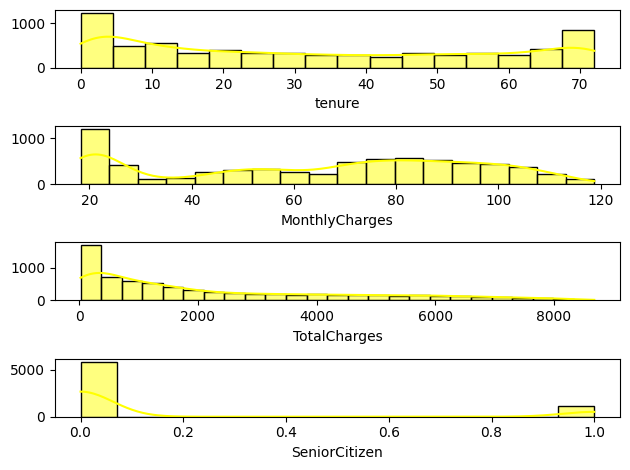

In [ ]:
# Numeric features

for i, col in enumerate(numerical_features):
    plt.subplot(4, 1, i + 1)
    sns.histplot(df.loc[:, col], kde=True, color='yellow')
    plt.ylabel('')
    plt.tight_layout()

plt.show()


**observation:**

        *   Tenure        : Tenure shows a balanced distribution and high churn concentration in the first months
        *   MonthlyCharges: Average of monthlycharges is up to 60
        *   TotalCharges  : Positively skewed means mostly customers (75%) have lower total charges
        *   SeniorCitizen : Most of customer is non seniorcitizen


## Insight

The Telco churn dataset, along with the EDA analysis, provides valuable insights that can be utilized to enhance feature performance and reduce churn rates in the future. The insights obtained are as follows:

- The majority of customers are male, although the difference in the ratio between male and female users is not significantly different.
- Most users are single.
- More than 80% of users are young.
- Over 40% of senior users experience churn.
- Users with month-to-month contracts have a churn rate of over 40%.
- The average customer tenure is approximately 32 months.
- 75% of customers pay less than $89.86 per month, resulting in relatively low total charges.